<a href="https://colab.research.google.com/github/were007/Autolib-Dataset./blob/main/Prediction_of_Individuals_who_are_most_likely_to_have_or_use_a_bank_Account.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1  Defining the Question

## 1.1.1 Specifying the question

In [ ]:
# Predicting individuals who are most likely to have/use a bank account.

# Provide an indication of the state of the financial inclusion in kenya, Rwanda, Tanzania and Uganda.

# Provide insights into some of the key demographic factors that might drive individual's financial outcomes.

## 1.1.2 Defining the Metric for Success

In [ ]:
# Below will be the objectives of this project:

# Exploratory Data Analysis,
# Univariate, Bivariate and Multivariate analysis,
# Visualizations,
# Reduction techniques, and 
# Mutiple Regression model.

## 1.1.3 Understanding the context

In [ ]:
# Variable Definitions / Data Dictionary: https://bit.ly/VariableDefinitions 

# Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
# For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

# Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. 

# Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, 
# banks still play a pivotal role in facilitating access to financial services. 
# Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and 
# improve their access to other financial services. 
# Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## 1.1.4 Recording the Experimental Design

In [ ]:
# To successfully conduct this project the following steps will be taken in order:

# Conduct Exploratory Data Analysis,
# Univariate, Bivariate and Multivariate analysis,
# Create Visualizations,
# Apply Reduction techniques, 
# Create a Mutiple Regression model for predictions,
# challenging the solution to find our if its the best for this for this particular scenario.
 

## 1.1.5 Data Relevance

In [ ]:
# The data is provided as below.
# It contains relevant variables that can be used for our prediction.
# The main dataset contains demographic information and what financial services are used by individuals across East Africa.
# This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:
# FinAccess Kenya 2018: https://www.fsdkenya.org/blogs-publications/publications/2018-annual-report/
# Finscope Rwanda 2016: https://www.statistics.gov.rw/publication/finscope-rwanda-2016
# Finscope Tanzania 2017:  https://www.fsdt.or.tz/finscope/
# Finscope Uganda 2018: https://fsduganda.or.ug/finscope-2018-survey-report/ 
# Dataset Files:

# Variable Definitions: https://bit.ly/VariableDefinitions 
# Dataset: https://bit.ly/FinancialDataset

# 1.2 Reading the dataset

## 1.2.1 Importing Libraries we will need

In [ ]:
# Importing libraries we will use for our analysis

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
import warnings

warnings.filterwarnings('ignore')  # don't print out warnings

## 1.2.2 Creating a dataframe from our dataset

In [ ]:
# Loading the dataset
# creating a dataframe

df = pd.read_csv("http://bit.ly/FinancialDataset")


## 1.2.3 Viewing the dataset

In [ ]:
# viewing the first five entries in the dataset

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# # viewing the last five entries in the dataset

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
report = pp.ProfileReport(df)
report

Number of variables,13
Number of observations,23524
Total Missing (%),0.1%
Total size in memory,2.3 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [ ]:
# Checking the number of rows and columns

# df.shape

print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 23524 rows and 13 columns


In [ ]:
# checking the columns

df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# 1.3 Tidying the Datasets

In [ ]:
# Dropping columns we do not need for this analysis
# 

df = df.drop(['uniqueid'], axis = 1)


## 1.3.1 Handling messy columns names

In [ ]:
# checking the column names
# Renaming the columns: rectifying typos

df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [ ]:
df.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)

In [ ]:
df.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [ ]:
# Removing the spaces and setting all column names to lower case

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# confirming the columns names

df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

## 1.3.2 Missing values

In [ ]:
# Missing values

# checking the number of missing values by column

df.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
# Dropping all null values in our dataframe

df.dropna(inplace = True)

In [ ]:
# confriming there are no missing values

df.isnull().sum()

country                   0
year                      0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

## 1.3.3 Outliers

In [ ]:
# checking for outliers on the variable (Household_size) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 150)
df.boxplot(['household_size'])
plt.title("A boxplot showing Number of people living in one house", color = 'blue')
plt.show()


# the boxplot shows that there are no outliers

In [ ]:
# checking for outliers on the variable (respondent_age) using boxplot


# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart


plt.figure(dpi = 150)
df.boxplot(['respondent_age'])
plt.title("A boxplot showing the age of the interviewee", color = 'green')
plt.show()


# the boxplot shows that there are no outliers

## 1.3.4 Anomalies

In [ ]:
# From the profile report we saw that the year column had anomalies (2029,2059,2039)

# the data description of the year column (Year survey was done in) only included(2016,2017,2018)

In [ ]:
# Removing the anomalies on the year column

indexnames = df[df['year'] > 2018].index

df.drop(indexnames, inplace = True)


In [ ]:
# checking that there are no anomalies in the year column

df.year.unique()

array([2018, 2016, 2017])

# 1.4 Exploratory Data Analysis

## 1.4.1 UNIVARIATE

### 1.4.1.1 Visualization

### Pie charts

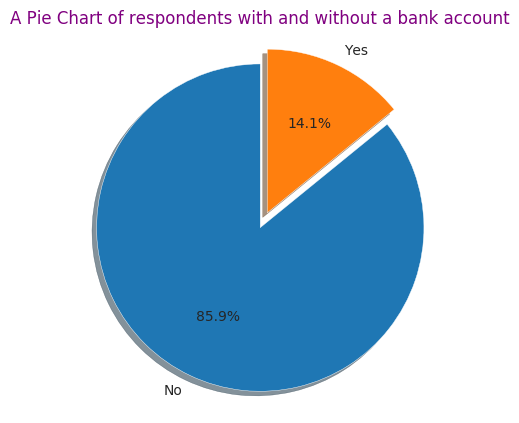

In [ ]:
# A pie chart of the respondents who had/ had no bank account

# grouping the data to be plotted

account = df.has_a_bank_account.value_counts()
account

# accessing the data to plot

# labels
sizes= account.index
sizes

# values
data = account.values
data

# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'purple')
plt.show()


# the pie chart shows only a few respondents (14.1%) had a bank account 
# the majority (85.9%) did not have a bank account

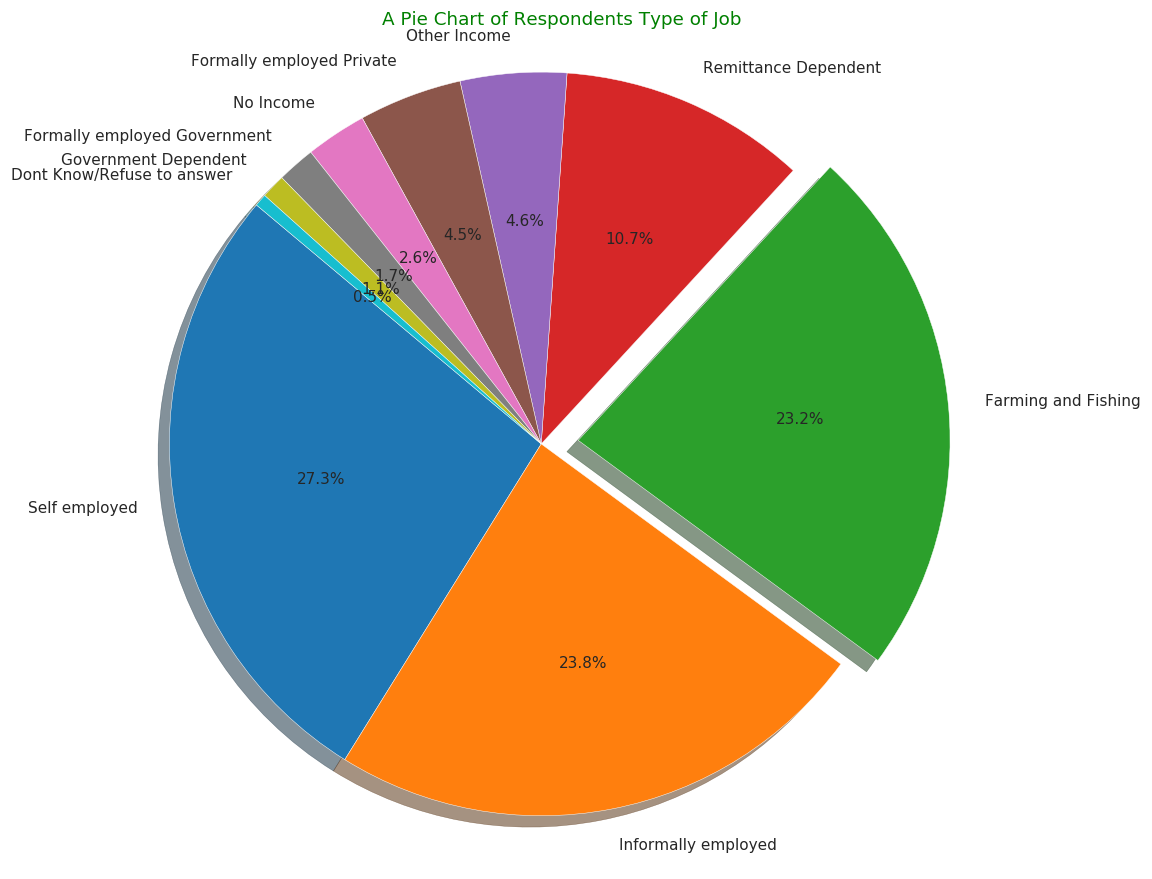

In [ ]:
# A pie chart of the respondents type of job

# grouping the data to be plotted

job = df.type_of_job.value_counts()
job

# accessing the data to plot

# labels
sizes3= job.index
sizes3

# values
data3 = job.values
data3

# plotting the pie chart

plt.figure(figsize = (10,10), dpi = 110)
plt.pie(data3, labels = sizes3, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0,0,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents Type of Job', color = 'green')
plt.show()


# the pie chart shows that the top 3 were self employed, informed employed, and practicing farming and fishing. 
# the majority (85.9%) did not have a bank account

### Bar Charts

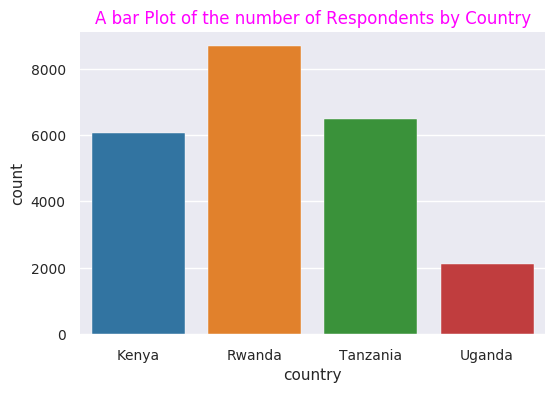

In [ ]:
# Plotting a bar plot of the respondent country 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()


# The bar chart shows that most respondents were from Rwanda 
# the least number of respondents were from Uganda
# the number of respondents by country were not equal


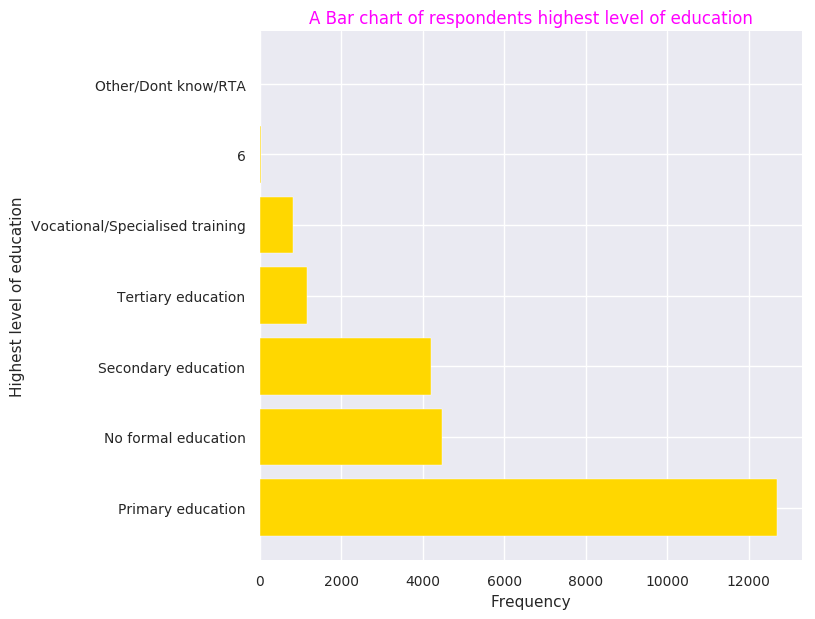

In [ ]:
# # Plotting a horizontal bar plot of the respondent highest level of education 



# grouping the data to be plotted

Edu = df.level_of_education.value_counts()
Edu

# accessing the data to plot

# labels
sizes2= Edu.index
sizes2

# values
data2 = Edu.values
data2

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes2, data2, color = 'gold')
plt.ylabel("Highest level of education")
plt.xlabel('Frequency')
plt.title("A Bar chart of respondents highest level of education", color = 'magenta')
plt.show()


# most respondents' highest level of education was the primary school
# there are other categories with the least number (others and 6)
# the 6 category seems to be an anomaly.

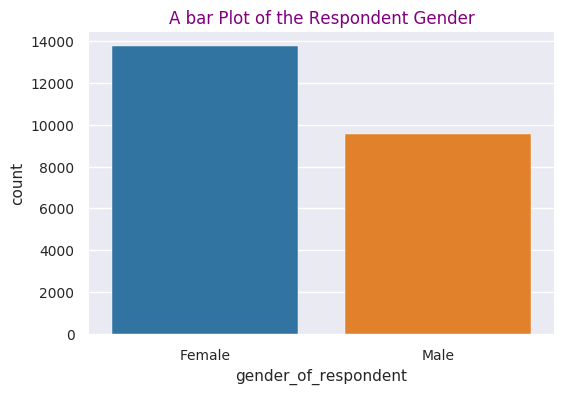

In [ ]:
# Plotting a bar plot of the respondent gender 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.gender_of_respondent)
plt.title('A bar Plot of the Respondent Gender', color = 'purple')
plt.show()


# The bar chart shows that there were more female respondents than male respondents 

### Histograms

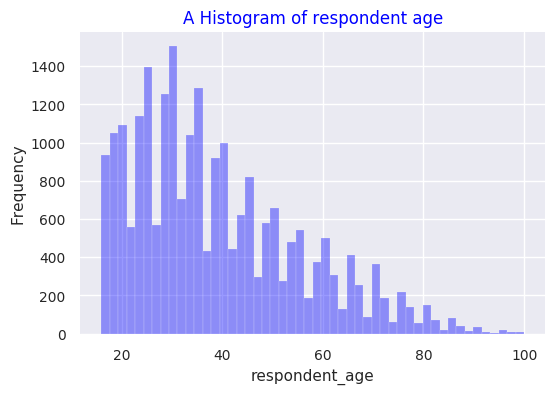

In [ ]:
# Histogram of respondent age
# 

# Using seaborn to create a histogram
# labeling the y axis
# Giving a title to our chart
# Displaying our chart


plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df['respondent_age'], kde = False, color = 'blue')  
plt.title('A Histogram of respondent age', color = 'blue')
plt.ylabel('Frequency')
plt.show()


# the histogram shows us that the age distribution is skewed to the right
# this is because the tail is long to the right side





# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.

# When a distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,
# and the mean is less than the mode. This situation is also called negative skewness.

# When a distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side, 
# and the mean is greater than the mode. This situation is also called positive skewness.

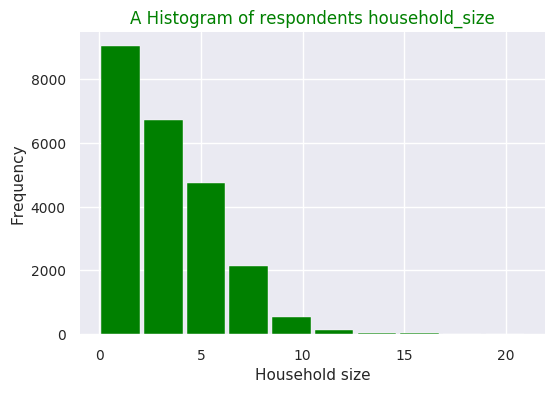

In [ ]:
# Histogram of respondent household_size
	 

# Using matplotlib to create a histogram
# labeling the x axis
# labeling the y axis
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 100)
plt.hist(df['household_size'], bins = 10, histtype = 'bar', rwidth = 0.9, color = 'green')
plt.xlabel('Household size')
plt.ylabel('Frequency')
plt.title('A Histogram of respondents household_size', color = 'green')
plt.show()

# the histogram shows us that the household size distribution is skewed to the right
# this is because the tail is long to the right side

###  Frequency tables

In [ ]:
# Frequency table of type of locations categories and their value counts


# Making a crosstab
# Naming the count column

location = pd.crosstab(index = df['type_of_location'], columns = 'count')
location

# Most respondents were from the rural areas

col_0,count
type_of_location,
Rural,14263
Urban,9077


In [ ]:
# Frequency table of cell_phone_access categories and their value counts


# Making a crosstab
# Naming the count column

phone = pd.crosstab(index = df['cell_phone_access'], columns = 'count')
phone

# Most respondents had access to a cell phone 

col_0,count
cell_phone_access,
No,6009
Yes,17331


In [ ]:
# Frequency table of interviewee relationship_with_head of the house categories and their value counts


# Making a crosstab
# Naming the count column

relation = pd.crosstab(index = df['the_relationship_with_head'], columns = 'count')
relation

# Majority of the respondents were the head of the household followed by the spouse
# while the least constituted other non-relatives.

col_0,count
the_relationship_with_head,
Child,2221
Head of Household,12729
Other non-relatives,189
Other relative,662
Parent,1069
Spouse,6470


In [ ]:
# Frequency table of interviewee martial status categories and their value counts


# Making a crosstab
# Naming the count column

marital = pd.crosstab(index = df['marital_status'], columns = 'count')
marital

# Majority of the respondents were married and living together with their spouses folowed by single/never married

# while the least constituted of people who did not know their marital status.

col_0,count
marital_status,
Divorced/Seperated,2049
Dont know,8
Married/Living together,10698
Single/Never Married,7902
Widowed,2683


### 1.4.1.2 Analysis

### Measures of Central Tendency

In [ ]:
# MEAN

In [ ]:
# Mean of the respondent household_size

df.household_size.mean()

# average household size was 3

3.688560411311054

In [ ]:
# Mean of the respondent respondent_age

df.respondent_age.mean()

# average age of the interviewees was 38

38.80706940874036

In [ ]:
# MODE

In [ ]:
# mode of the respondent household_size

df.household_size.mode()

# most occuring household size was 2 members only

0    2.0
dtype: float64

In [ ]:
# mode of the respondent_age

df.respondent_age.mode()

# most occuring age is 30

0    30.0
dtype: float64

In [ ]:
# MEDIAN

In [ ]:
# median of the respondent household_size

df.household_size.median()


# arranging the data in ascending/descending order, the middle observation for the household size was 3

3.0

In [ ]:
# median of the respondent_age

df.respondent_age.median()

## arranging the data in ascending/descending order, the middle age was 35

35.0

### Measures of Dispersion/Variability/Spread

In [ ]:
# RANGE


# difference between lowest and highest value
# find maximum value 
# find minimum value
# range = max - min

In [ ]:
# Range of the household_size

hMax = df.household_size.max()
print(hMax)

hMin = df.household_size.min()
print(hMin)

hRange = hMax - hMin
hRange

21.0
0.0


21.0

In [ ]:
# Range of the respondent_age

aMax = df.respondent_age.max()
print(aMax)

aMin = df.respondent_age.min()
print(aMin)

aRange = aMax - aMin
aRange

100.0
16.0


84.0

In [ ]:
# QUANTILES

# Quartiles are values that divide your data into quarters when data is sorted in an ascending order.

# There are three quartile values. 

# Q1: First quartile is the 25 percentile. 
# Q2: Second quartile is the 50 percentile...also...median of the data
# Q3: Third quartile is the 75 percentile. 


# THE INTERQUARTILE RANGE ...also ..IQR

# IQR = Q3 -Q1

In [ ]:
# Quantiles of the household_size

df["household_size"].quantile([0.25,0.5,0.75])


0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Quantiles of the respondent_age

df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [ ]:
# STANDARD DEVIATION

# Average distance between each obseravtion from the mean. 
# I.e., how data is spread out from mean. 
# A low std dev indicates that the data points tend to be close to the mean of the data set, 
# A high std dev indicates that the data points are spread out over a wider range of values.

In [ ]:
# Standard Deviation of the household_size

df.household_size.std()


# 2.3 is a low std dev hence the data points are close to the mean (3.7) of the data set

2.2812745975350435

In [ ]:
# Standard Deviation of the respondent_age

df.respondent_age.std()


# 16.5 is a high std dev showing that the data points are spread out over a wide range of values

16.519904564514412

In [ ]:
# VARIANCE 

# square of average distance between each observation and mean. 
# I.e. square of standard deviation. 
# It is a measure of how dispersed or spread out the set is, 

# If a data set has a variance of zero, then every member of it is the same. 
# If the variance is high, especially as a ratio to the mean, then the data have some very large dis-similarities amongst its members. 


In [ ]:
# Variance of the household_size

df.household_size.var()


# var of 5.2 is a small variance compared to the mean of 3.7 hence the dataset does have few dis-similarities amongst its members

5.204213789358675

In [ ]:
# Variance of the respondent_age

df.respondent_age.var()


# var of 272.9 is very large compared to the mean of 38.8. This indicates that the age distribution have some very large dis-similarities.

272.90724682066417

In [ ]:
# SKEWNESS 

# A measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
# In a perfect normal distribution, the tails on either side of the curve are exact mirror images of each other.
# A negative value means the distribution is negatively skewed.....or...skewed to the left
# A positive value means the distribution is positively skewed.....or...skewed to the right

In [ ]:
# Skewness of the household_size

df.household_size.skew()

# The household size distribution is skewed to the right since its skewness is a positive value.
# This was also seen in the histogram above on visualizations: long right tail.

0.9741827150450616

In [ ]:
# Skewness of the respondent_age


df.respondent_age.skew()

# The age distribution is skewed to the right since its skewness is a positive value.
# This was also seen in the age histogram above on visualizations: long tail on the right handside.

0.8406145812311228

In [ ]:
# KURTOSIS 

# A measure of whether the data are heavy-tailed (profusion of outliers)
# or light-tailed (lack of outliers) relative to a normal distribution.
# If the kurtosis is close to 0, then a normal distribution is often assumed....These are called mesokurtic distributions.                        
# If the kurtosis is less than zero, then the distribution has light tails ......called a platykurtic distribution.  
# If the kurtosis is greater than zero, then the distribution has heavier tails .... called a leptokurtic distribution.

In [ ]:
# Kurtosis of the household_size

df.household_size.kurt()



# The household kurtosis is greater than zero hence the distribution has heavier tails ....This is called a leptokurtic distribution

1.1538357462528523

In [ ]:
# Kurtosis of the respondent_age

df.respondent_age.kurt()

# The kurtosis is close to 0, hence a normal distribution is assumed....This is called mesokurtic distributions

0.09826807013177241

## 1.4.2 BIVARIATE

In [ ]:
# Analysis of two different variables to find their causes and relationships between them 

### 1.4.2.1 Visualization

### Scatter Plots

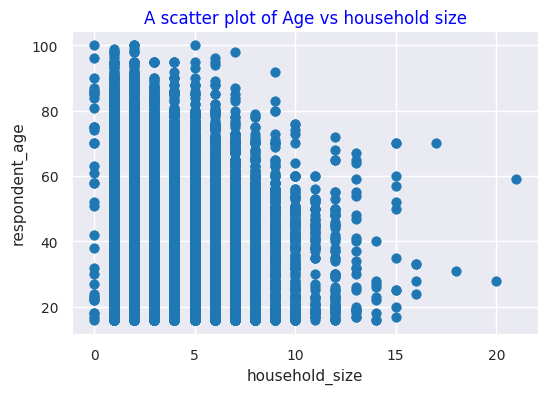

In [ ]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['household_size'], df['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()




# There is no correlation between age and household size in the dataset as the points are scattered throughout the graph.

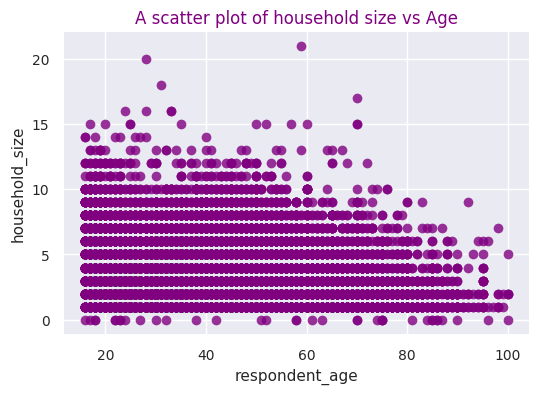

In [ ]:
# Or Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 100)
sns.regplot(x= df['respondent_age'], y= df['household_size'], fit_reg = False, color = 'purple')
plt.title("A scatter plot of household size vs Age", color = 'purple')
plt.show()



# There is no correlation as the points are scattered throughout the graph.

### Line Charts

In [ ]:
# Selecting a few observations in each column to plot a line graph
# There are too many observations to plot all
# using the iloc to select
# 50 rows  
# previewing the selection

df5 = df.iloc[0:50,-7:-5] 
df5.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


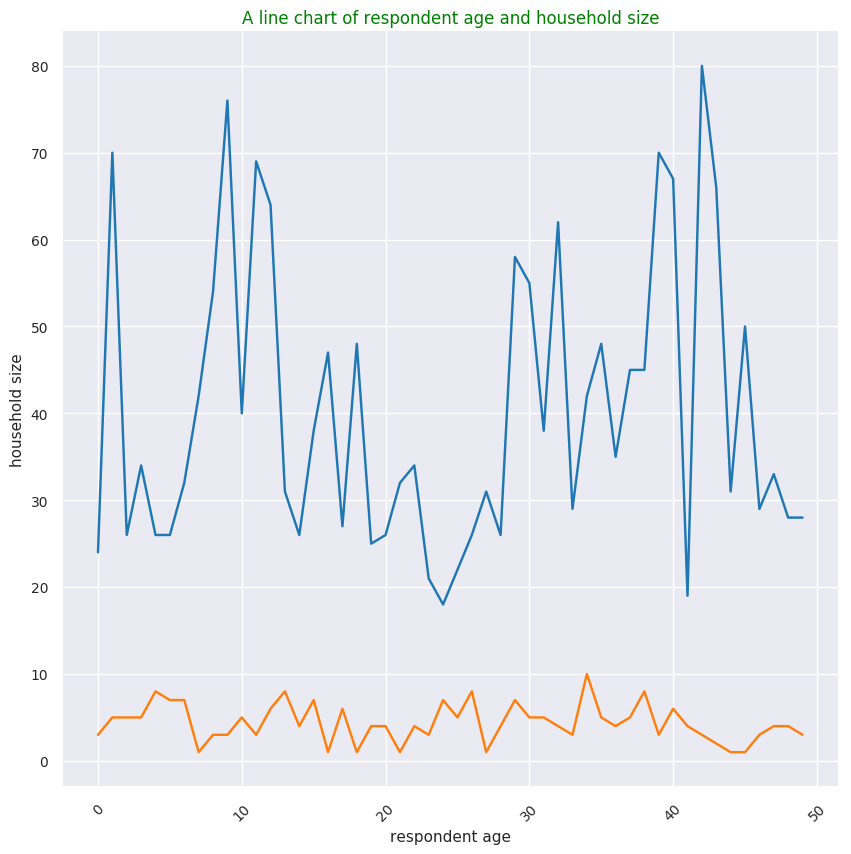

In [ ]:
# Line chart of the respondent age and household size for the first 50 rows only


# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks
# labelling the title
# labelling the x axis
# labelling the y axis
# Displaying our chart



plt.figure(figsize = (10,10), dpi = 100)
plt.plot(df5[['respondent_age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Green')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

### Correlation

In [ ]:
# Correlation


# It is a statistical measure that describes the association between random variables.

# Calculate the pearson correlation coefficient; It is the most widely used correlation coefficient.

# Positive correlation is a relationship between two variables in which both variables move in tandem i.e. in the same direction.

# Negative correlation/ inverse correlation is a relationship between two variables whereby they move in opposite directions. 

# Correlation coefficients between -.20 and .20 are generally considered weak, 

# Between .20 and .50 (positive or negative) are considered moderate, 

# Above.50 (positive or negative) are considered strong. 



In [ ]:
# Calculating the Pearson Correlation Co-efficient

PCORR = df["respondent_age"].corr(df["household_size"], method="pearson") 
print(PCORR)

# We do not need to define the pearson, it calculates by default

pcorr = df["respondent_age"].corr(df["household_size"]) 
print(pcorr)



# Since the correlation coefficent of Age and Household is -0.12, 
# this means that Age and Household have a very weak negative correlation

-0.11967115234154871
-0.11967115234154871


In [ ]:
# Calculating the pearson coefficient of the entire dataframe

df.corr() 

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


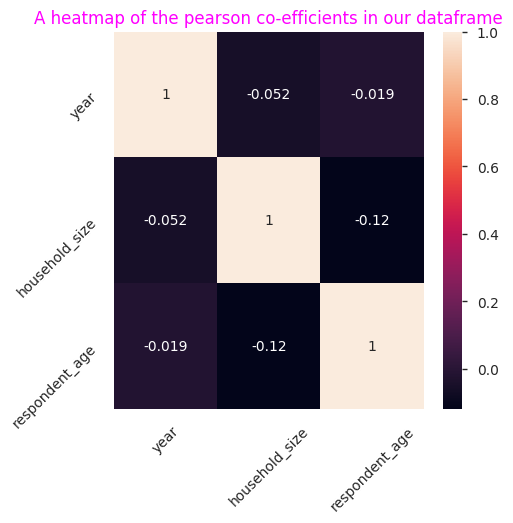

In [ ]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = df.corr()
plt.figure(figsize = (5,5), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "magenta")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()
  


# all the variables have weak negative correlation with other variables other with themselves

### Stacked Bar

In [ ]:
# Stacked Bar Chart

# Stacked column charts work well when the focus of the chart is to compare the totals and one part of the totals. 
# It is a useful graph to visualize the relationship between two categorical variables. 
# It compares the percentage that each category from one variable contributes to a total across categories of the second variable.


## 1.4.3 MULTIVARIATE

In [ ]:
# Here we focus on analyzing more than 2 statistical variables at once.

In [ ]:
# To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)

# Pandas has a function which can turn a categorical variable into a series of zeros and ones, 

# This makes them a lot easier to quantify and compare.


In [ ]:
# Converting the categories into dummy variables with ones and zeros

# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Since we’ve created a whole new dataframe, 
# in order to compare it to our original dataframe,
# we’re going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1.

# concatenating 

dff = pd.concat([df, dummy], axis = 1)
dff.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### 1.4.3.1 Reduction Techniques

In [ ]:
# Now we have a bunch of variables;
# To visualize patterns much better;
# We can reduce our bunch of variables into 2 or 3 significant ones;
# Without losing the essence of the data collected.

### Principal Component Analysis (PCA)

In [ ]:
# PCA, is a statistical technique to convert high dimensional data to low dimensional data by 
# selecting the most important features that capture maximum information about the dataset.
# The features are selected on the basis of variance that they cause in the output. 
# The feature that causes highest variance is the first principal component. 
# The feature that is responsible for second highest variance is considered the second principal component, and so on.
# Note: principal components do not have any correlation with each other.

# PCA can only be applied to numeric data. 
# Therefore, categorical features are required to be converted into numerical features before PCA can be applied. (already done in the dummies above)

In [ ]:
# Preprocessing steps


# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = dff.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = dff['has_a_bank_account']

In [ ]:
X.head(5)

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y.head(2)

0    Yes
1     No
Name: has_a_bank_account, dtype: object

In [ ]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca1 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [ ]:
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 


explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.09003043, 0.08513318, 0.06998383, 0.05771415, 0.05318234,
       0.04514677, 0.0432768 , 0.03926415, 0.03545819, 0.03394847,
       0.03330927, 0.03199837, 0.0303673 , 0.029832  , 0.02964657,
       0.0294306 , 0.0292778 , 0.02886887, 0.02808617, 0.0275626 ,
       0.02639397, 0.02608592, 0.02502549, 0.02294737])

In [ ]:
# step 6:
# Using the 24 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)


In [ ]:
# step 8
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



# From the output we see that with only one feature, 
# the random forest algorithm is able to correctly predict 4041 out of 4668 instances, 
# resulting in 86.56% accuracy.

[[4036    0]
 [ 627    5]]
Accuracy 0.865681233933162


###  Linear Discriminant Analysis (LDA)

In [ ]:
# It is a simple but a very powerful linear transformation.
# It is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. 
# The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting ("curse of dimensionality") and 
# also reduce computational costs.

In [ ]:
# Step a
# Divide dataset into features (z) and corresponding labels (s)
# and then divide the resultant dataset into training and test sets. 

# The following code divides data into labels and feature set. 
# The code assigns the first four columns of the dataset i.e. the feature set to X variable 
# while the values in the fifth column (labels) are assigned to the y variable.
#
z = dff.iloc[:, 12:].values
s = dff.iloc[:, 2].values

In [ ]:
z

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
s

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
# Step b: 
# Divide data into training and test sets
#
from sklearn.model_selection import train_test_split

z_train, z_test, s_train, s_test = train_test_split(z, s, test_size=0.2, random_state=0)

In [ ]:
# step c
# Performing feature scaling. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z_train = sc.fit_transform(z_train)
z_test = sc.transform(z_test)

In [ ]:
# step d
# Performing LDA with Scikit-Learn. 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=24)
z_train = lda.fit_transform(z_train, s_train)
z_test = lda.transform(z_test)

 
# The n_components parameter of the LDA, refers to the number of linear discriminates that we want to retrieve. 
# We fit and transform methods to retrieve the linear discriminants.
# Incase of LDA, the transform method takes two parameters: the z_train and the s_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [ ]:
# step e
# Training and Making Predictions
# Using random forest classifier to evaluate the performance
# 

from sklearn.ensemble import RandomForestClassifier

classifier1 = RandomForestClassifier(max_depth=2, random_state=0)
classifier1.fit(z_train, s_train)

# # predicting the Test set results

s_pred = classifier1.predict(z_test)

In [ ]:
# step f
# Evaluating the Performance of the algorithm
# Using a confusion matrix and the accuracy score.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(s_test, s_pred)
print(cm1)
print('Accuracy' + str(accuracy_score(s_test, s_pred)))

# With 24 linear discriminants, the algorithm achieved an accuracy of 88.71%, 
# which is a little bit higher than the accuracy achieved with 24 principal component, which was 86.57%.

[[3992   44]
 [ 483  149]]
Accuracy0.8871036846615252


### 1.4.3.2 Multiple Regression Analysis

In [ ]:
# Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. 
# It is assumed that there is approximately a linear relationship between X and Y. 
# Mathematically, this relationship is represented as: Y ≈ ɒ + ß X + ℇ where ɒ and ß are two unknown constants 
# that represent intercept and slope terms in the linear model 
# and ℇ is the error in the estimation.

# Linear Regression:
          # Fast and easy to model
          # very sensitive to outliers.
          # less complex with less data
          # easy to understand and interpret

        # libraries we need in addition to others earlier imported
        
from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [ ]:
# Binary encoding our Target variable
# since it has two categories (yes/no)

dff['bank'] = dff['has_a_bank_account'].map( {'Yes':1, 'No':0} )
dff[['bank', 'has_a_bank_account']]



,bank,has_a_bank_account
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
5,0,No
6,0,No
7,0,No
8,1,Yes
9,0,No


In [ ]:
# Confirming that we have no anomalies and null values in the new column created
#

dff.bank.unique()

dff.isnull().sum()

country                                               0
year                                                  0
has_a_bank_account                                    0
type_of_location                                      0
cell_phone_access                                     0
household_size                                        0
respondent_age                                        0
gender_of_respondent                                  0
the_relationship_with_head                            0
marital_status                                        0
level_of_education                                    0
type_of_job                                           0
country_Kenya                                         0
country_Rwanda                                        0
country_Tanzania                                      0
country_Uganda                                        0
type_of_location_Rural                                0
type_of_location_Urban                          

In [ ]:
# Describing our data

dff.info()
dff.describe()
dff.columns

# has_a_bank_account is the dependent variable and the last 34 columns are the independent variables, 
# here we are predicting which individuals are most likely to have or use a bank account. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 51 columns):
country                                               23340 non-null object
year                                                  23340 non-null int64
has_a_bank_account                                    23340 non-null object
type_of_location                                      23340 non-null object
cell_phone_access                                     23340 non-null object
household_size                                        23340 non-null float64
respondent_age                                        23340 non-null float64
gender_of_respondent                                  23340 non-null object
the_relationship_with_head                            23340 non-null object
marital_status                                        23340 non-null object
level_of_education                                    23340 non-null object
type_of_job                                           

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job', 'country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
  

In [ ]:
# PAIRPLOT

# Creating a pairplot to build histograms and scatter plots.
# using seaborn visualization library

sns.pairplot(dfc)

 
# The histogram on the diagonal allows us to see the distribution of a single variable
# Whereas the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

In [ ]:
# Correlation between the variables in the dataset.
# The correlation coefficient, is an index that ranges from -1 to 1. 
# Values near zero indicate that there is no linear relationship. 
# As the correlation gets closer to plus or minus one, the relationship is stronger. 
# A value of one (or negative one) indicates a perfect linear relationship between two variables.


dff.corr()

,year,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
year,1.000000,-0.052484,-0.018554,0.713300,-0.886023,0.016489,0.378159,-0.214621,0.214621,0.066637,-0.066637,0.000024,-0.000024,-0.059316,0.030285,-0.013929,0.081738,0.002436,-0.023468,0.018040,0.022299,-0.004649,0.021121,-0.041373,-0.016910,-0.095471,0.022299,-0.081048,0.119042,0.040393,0.129731,0.012318,-0.249458,0.055667,0.093995,-0.006624,-0.155148,0.081375,0.101320,0.095562,0.181242
household_size,-0.052484,1.000000,-0.119671,0.077525,0.267970,-0.478472,0.178294,0.274154,-0.274154,-0.098177,0.098177,-0.010070,0.010070,0.203904,-0.244217,0.020718,0.013822,0.044016,0.108170,-0.130272,-0.008633,0.346324,-0.182569,-0.154061,0.001883,-0.006531,0.004557,-0.024300,0.103149,-0.096517,-0.023578,0.023656,0.186819,0.002535,-0.071401,-0.046451,0.013464,-0.064869,0.062435,0.009102,-0.163152
respondent_age,-0.018554,-0.119671,1.000000,0.029294,0.021959,-0.012208,-0.062924,0.047614,-0.047614,0.103969,-0.103969,-0.013373,0.013373,-0.302935,0.419646,-0.078846,-0.134989,-0.195297,-0.111171,-0.119170,0.005260,0.054593,-0.298220,0.462584,0.024050,0.360483,0.009464,-0.071316,-0.210563,-0.090477,-0.037490,-0.003905,0.153864,-0.005603,-0.062173,0.172067,-0.088874,-0.059476,-0.014318,-0.059127,-0.000039
country_Kenya,0.713300,0.077525,0.029294,1.000000,-0.455904,-0.367999,-0.186005,-0.032965,0.032965,-0.062058,0.062058,-0.018949,0.018949,0.065982,0.044143,-0.013179,0.045358,-0.116685,-0.052046,-0.061522,0.031261,0.145206,-0.112606,-0.006998,-0.020158,-0.054444,0.031261,-0.137202,0.175816,-0.002656,0.125575,-0.039448,0.045759,0.121626,0.067535,0.000809,-0.005100,-0.097686,-0.058555,0.168991,-0.153199
country_Rwanda,-0.886023,0.267970,0.021959,-0.455904,1.000000,-0.478187,-0.241700,0.388180,-0.388180,-0.153771,0.153771,0.009144,-0.009144,0.115923,-0.034620,0.015516,-0.084515,-0.070680,0.023767,-0.092804,-0.014252,0.211012,-0.201689,0.052765,0.020746,0.099860,-0.014252,0.015622,-0.018387,-0.102367,-0.100788,0.010320,0.377594,-0.011538,-0.097856,-0.000771,0.164217,-0.126936,-0.032816,-0.079008,-0.351659
country_Tanzania,0.016489,-0.478472,-0.012208,-0.367999,-0.478187,1.000000,-0.195096,-0.430581,0.430581,0.205389,-0.205389,-0.019766,0.019766,-0.137632,0.017291,-0.007076,0.027428,0.147812,-0.006799,0.165964,-0.011504,-0.446253,0.394944,-0.035418,-0.012708,-0.034507,-0.011504,0.119837,-0.185845,0.144244,-0.028390,-0.045589,-0.341760,-0.080566,0.032978,0.014210,-0.060252,0.119596,-0.121157,-0.010635,0.415051
country_Uganda,0.378159,0.178294,-0.062924,-0.186005,-0.241700,-0.195096,1.000000,0.069412,-0.069412,0.033127,-0.033127,0.044603,-0.044603,-0.081403,-0.036291,0.005077,0.030319,0.066715,0.050314,-0.008961,-0.005815,0.120256,-0.105568,-0.022945,0.015771,-0.031228,-0.005815,-0.003875,0.052830,-0.049033,0.022315,0.114556,-0.172742,-0.040722,0.010153,-0.0222

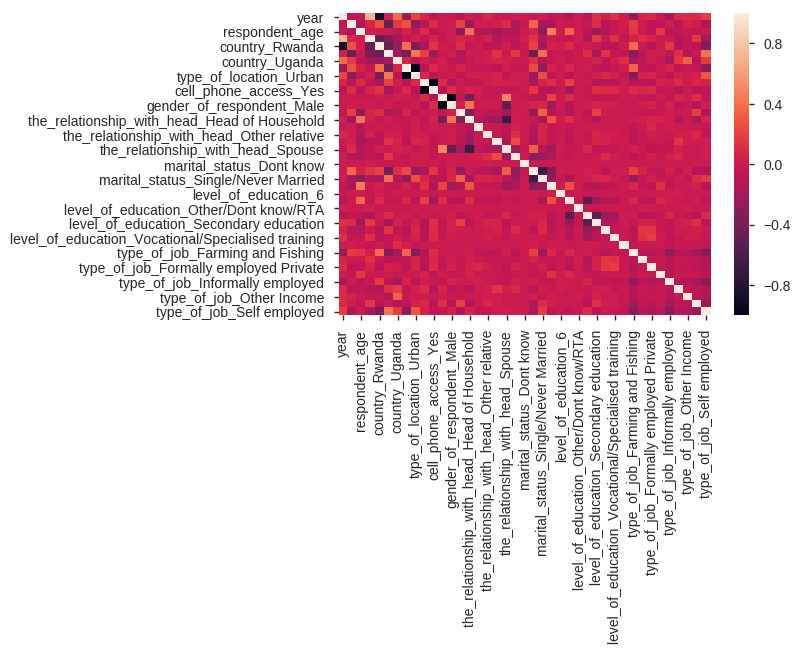

In [ ]:
# Heatmap
# Plots the correlation.
# The darker shade shows that there is no linear relationship between the two variables. 
# A lighter shade shows that the relationship between the variables is more linear.

plt.figure(dpi = 100)
sns.heatmap(dff.corr())

In [ ]:

# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.


X = dff[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
y = dff['bank']

In [ ]:
X.head(2)

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
y.head(2)

0    1
1    0
Name: bank, dtype: int64

In [ ]:
# The main aim is to create a model that generalises well to new data.
# Trained data is the data on which we apply the linear regression algorithm. 
# 40% of the data will go to the test data
# 60% remains in the training set.
# And finally we test that algorithm on the test data. 


# First we split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 101)

In [ ]:
# Importing Linear Regression model from sklearn


from sklearn.linear_model import LinearRegression


In [ ]:
# Then we create and train the model by fitting the linear regression model on the training data.

lm = LinearRegression()

results = lm.fit(X_train,y_train)

In [ ]:
# Grabbing predictions off the test set and see how well it did

predictions = lm.predict(X_test)


In [ ]:
# visualising the prediction

plt.scatter(y_test, predictions)


In [ ]:
# Coefficient of determination, R2, is the fraction (percentage) of variation in the response variable Y 
# that is explainable by the predictor variable X. It ranges between 0 (no predictability) to 1 (or 100%) 
# which indicates complete predictability.A high R2 indicates being able to predict response variable with less error.


r2_score(y_test, predictions) 

# The results indicates that the model explains 25.9% of the variability of the response data
# This indicates that the model is not a good fit.

0.25921620103062504

In [ ]:

# The idea of linear regression model is to have the coefficients of the equation that will allow us to make a prediction. 

# We can return a python tuple containing an array with the coefficients and the intercept value as in the output

(lm.coef_, lm.intercept_) 

(array([-1.51527547e+10, -2.31972265e+12, -2.35002816e+12, -2.33487540e+12,
        -2.31972265e+12,  4.96611777e+12,  4.96611777e+12, -4.76921148e+11,
        -4.76921148e+11,  5.79961115e+11,  5.79961115e+11, -1.53924580e+12,
        -1.53924580e+12, -1.53924580e+12, -1.53924580e+12, -1.53924580e+12,
        -1.53924580e+12, -1.25507571e+12, -1.25507571e+12, -1.25507571e+12,
        -1.25507571e+12, -1.25507571e+12,  1.12910647e+12,  1.12910647e+12,
         1.12910647e+12,  1.12910647e+12,  1.12910647e+12,  1.12910647e+12,
         1.12910647e+12, -1.78811034e+12, -1.78811034e+12, -1.78811034e+12,
        -1.78811034e+12, -1.78811034e+12, -1.78811034e+12, -1.78811034e+12,
        -1.78811034e+12, -1.78811034e+12, -1.78811034e+12]),
 31282149206088.164)

In [ ]:
# P-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.
# The p-value represents the probability that the coefficient is actually zero. A predictor (an independent variable) 
# that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value 
# are related to changes in the response variable. 
# Conversely, a larger (insignificant) p-value suggests that changes 
# in the predictor are not associated with changes in the response.


X2 = sm.add_constant(X.values)  
model = sm.OLS(y, X2).fit()  
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   bank   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     275.8
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:03:08   Log-Likelihood:                -4952.3
No. Observations:               23340   AIC:                             9967.
Df Residuals:                   23309   BIC:                         1.022e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.619e-05   4.01e-06      4.042      0.0

In [ ]:
# From the output above, 

# We see that the predictor (independent) variables x14, x16, x18 to x23 are statistically insigninficant because all of their p-values are greater than 0.05.

# However, the p-value for all others is less than 0.05 which indicates that it is statistically significant. 

# Typically you use coefficient p-values to determine which terms to keep in the regression model. 

# R-squared: 0.262 representing 26.2%. 

# We can interpret that the only 26.5% of the variation in the dependent variable was acounted for by the model. 

# The other 73.5% of the variation in the dependent variable is accouted for by factors outside the regression model above.

# This indicates that this is not the best model to use.

# Therefore, the nest step will be to challenge this solution and see if it best model to use.

# 1.5 Challenging the solution

### 1.5.1 Logistic Regression Analysis

In [ ]:
# Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

# In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.).

# In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# Logistic Regression Assumptions:

# Binary logistic regression requires the dependent variable to be binary.

# For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.

# Only the meaningful variables should be included.

# The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

# The independent variables are linearly related to the log odds.

# Logistic regression requires quite large sample sizes.

In [ ]:
# Logistic Regression Analysis
# Step 1
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.


A = dff[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
B = dff['bank']

In [ ]:

# Step 2
# splitting the data into
# Training set
# Test set


A_train, A_test, B_train, B_test = train_test_split(A,B,test_size = 0.2, random_state = 1)

In [ ]:
# Step 3
# Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)


In [ ]:
# Step 4
# Applying LDA
  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
A_train = lda.fit_transform(A_train, B_train)
A_test = lda.transform(A_test)


In [ ]:
# Step 5
# Training and Making Predictions

# Using random forest classification classifier to make predictions
  
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 1)
classifier.fit(A_train, B_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Step 6
# Predicting the Test set results

  
B_pred = classifier.predict(A_test)

In [ ]:
# Step 7
# Performing evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
confu_m = confusion_matrix(B_test, B_pred)
accu = accuracy_score(B_test, B_pred)
print(confu_m)
print(accu)


# Using LDA in our logistic regression model, the algorithm achieved an accuracy of 88.62%, 
#

[[3910   94]
 [ 437  227]]
0.8862467866323908


In [ ]:
# 

logit_model = sm.Logit(B,A)

result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.291345
         Iterations 13
                                                  Results: Logit
Model:                                Logit                            Pseudo R-squared:                 0.284     
Dependent Variable:                   bank                             AIC:                              13661.9965
Date:                                 2019-08-20 05:25                 BIC:                              13911.7922
No. Observations:                     23340                            Log-Likelihood:                   -6800.0   
Df Model:                             30                               LL-Null:                          -9503.3   
Df Residuals:                         23309                            LLR p-value:                      0.0000    
Converged:                            1.0000                           Scale:                            1.0000    
No. Iterations:     

In [ ]:
# The p-values for most of the variables are Greater than 0.05, while others have null values therefore.
# Therefore, Logistic Regression model is not the best model to use for our prediction here.
 

# 1.6 CONCLUSION

In [ ]:
# The Linear Regression Model though not the most robust here with an r2 = 26.2% is the better model to use for prediction.


QUESTION 2: HYPOTHESIS TESTING.

## 1.0 Defining the question

### 1.0.1 **Specifying the Data Analytic Question: PROBLEM STATEMENT**
Investigate about the blue cars from the autilob dataset.

> Null hypothesis: the average number of blue cars taken is not different to that of the blue cars returned


> Alternative hypothesis:  the average number of blue cars taken is different than that of the blue cars returned.








### 1.0.2 **Defining the Metric for Success**


> The objectives for this dataset includes investigating the claim listed above and knowing whether or not the the average number of blue cars taken is different to that of the blue cars returned.


### 1.0.3 **Understanding the context**

> Working as a Data Scientist for the Autolib electric car-sharing service company, our main task will be to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

## 1.1 Recording the Experimental Design

*   Define the research question,

*   Find and deal with outliers, anomalies, and missing data within the dataset,

*   Plot appropriate univariate and bivariate summaries recording the observations,

*   Implement the solution by performing hypothesis testing,
*  Challenge our solution by providing insights on how we can make improvements.



## 1.2 **Relevance of the data**

The data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysis.

# 2.0 **DATA EXPLORATION**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
##

In [ ]:
# reading in data
url = 'http://bit.ly/DSCoreAutolibDataset'
df = pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


### 2.1 Checking the data

In [ ]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# quantiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# ---
# 
df1 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# ---
# 
print(df1.shape)

# Printing the shape of our old dataset
# ---
#
print(df.shape)

(9783, 13)
(16085, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [ ]:
# determining the number of records in the dataset
df.shape

(16085, 13)

In [ ]:
# checking for duplicates
df1.duplicated().any()

False

In [ ]:
# checking for missing values
df1.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
df1.nunique()

Postal code                79
date                      130
n_daily_data_points         3
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        275
BlueCars_returned_sum     269
Utilib_taken_sum           11
Utilib_returned_sum        11
Utilib_14_taken_sum        24
Utilib_14_returned_sum     24
Slots_freed_sum            13
Slots_taken_sum            13
dtype: int64

# 3.0 **EXPLORATORY ANALYSIS**

In [ ]:
# Rename columns
col_names = df1.columns.tolist()
for col in range(len(col_names)):
  col_names[col] = col_names[col].lower().replace(" ", "_")

df1.columns = col_names

In [ ]:
df1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [ ]:
df1.shape

(9783, 13)

In [ ]:
df1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
df1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [ ]:
df1.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
6955,92260,6,weekend,35,42
12825,93800,0,weekday,7,11
6395,92230,2,weekday,42,35
13659,94130,2,weekday,24,27
12567,93600,1,weekday,24,29
5962,92200,2,weekday,48,48
15344,94700,4,weekday,38,39
9873,92800,2,weekday,85,86
5236,92140,3,weekday,79,68
6060,92200,2,weekday,67,65


In [ ]:
# Extract day type data
df2 = df1[df1.day_type == 'weekend']

In [ ]:
df2.sample(10)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
13884,94140,5,weekend,103,89
7980,92340,6,weekend,32,26
8679,92380,5,weekend,17,20
13210,94100,6,weekend,8,6
8496,92370,6,weekend,34,23
6569,92240,6,weekend,116,140
5707,92170,6,weekend,71,77
14226,94220,5,weekend,72,69
14761,94340,5,weekend,57,57
5596,92160,6,weekend,47,37




*   Since the selection requires one set of data which is either weekends or weekdays, I chose to work with the wekends.






In [ ]:
df2.shape

(2963, 5)

In [ ]:
df2.nunique()

postal_code               79
dayofweek                  2
day_type                   1
bluecars_taken_sum       241
bluecars_returned_sum    234
dtype: int64

### 3.1 Univariate analysis

In [ ]:
# get proprotion of day of week
df2['dayofweek'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: dayofweek, dtype: float64

*   From the dataset, the days of the week are coded with 5 being saturday and 6 being sunday

In [ ]:
# Describe numerical variables
df2[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


Text(0.5, 1.0, 'distribution of blue cars taken')

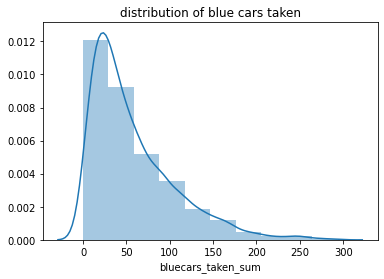

In [ ]:
# Plot bluecars taken
sns.distplot(df2['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

Text(0.5, 1.0, 'distribution of blue cars returned')

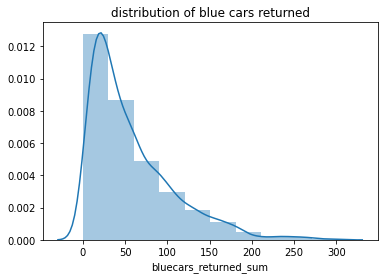

In [ ]:
# Plot bluecars returned 
sns.distplot(df2['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

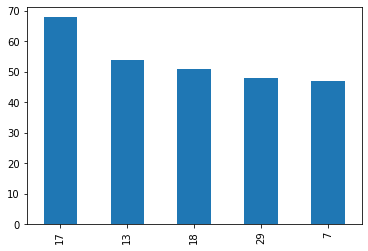

In [ ]:
df2['bluecars_returned_sum'].value_counts().head().plot.bar()

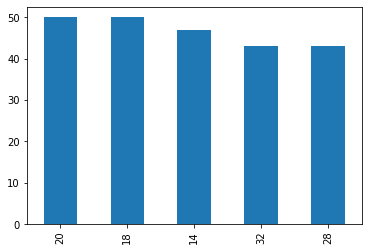

In [ ]:
df2['bluecars_taken_sum'].value_counts().head().plot.bar()

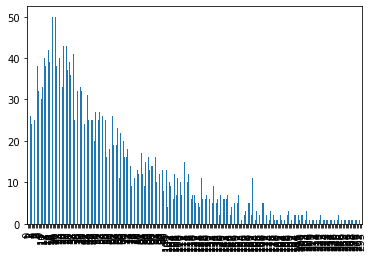

In [ ]:
df2['bluecars_taken_sum'].value_counts().sort_index().plot.bar()

In [ ]:
df2['postal_code'] = df2['postal_code'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['dayofweek'] = df2['dayofweek'].apply(str)
print(df2.dtypes)

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 3.2 Bivariate analysis

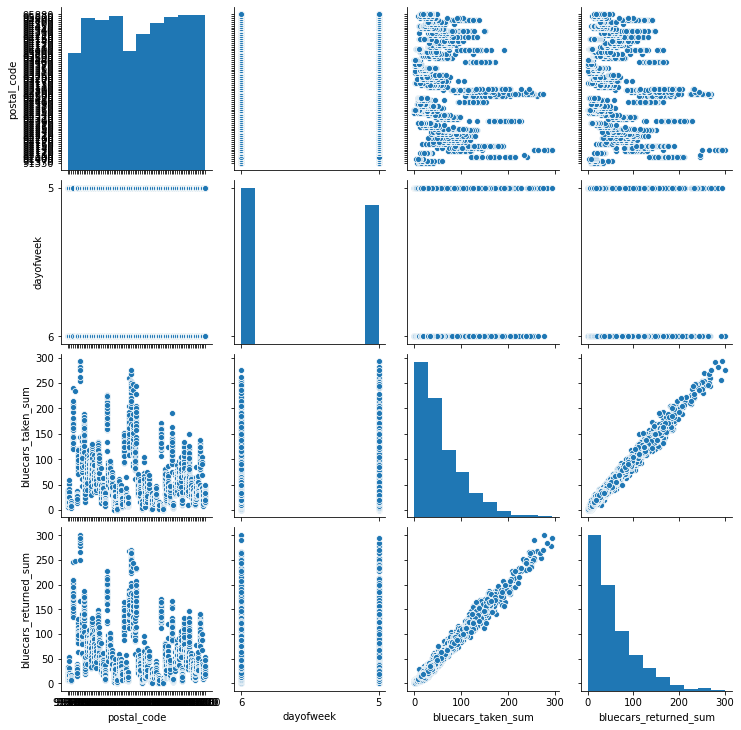

In [ ]:
# Ploting the bivariate summaries and recording our observations
# scatterplot
sns.pairplot(df2)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

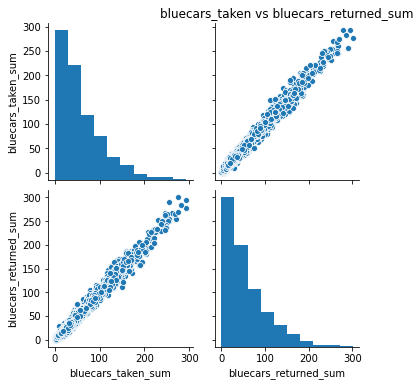

In [ ]:
# Determine correlation between numeric features
plt.figure(figsize=(12,10))
sns.pairplot(df2[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

In [ ]:
df2['bluecars_taken_sum'].corr(df2['bluecars_returned_sum'])

0.9906487464480561

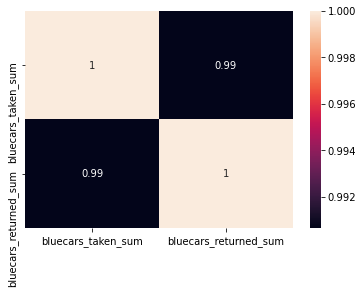

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

# 4.0 **IMPLEMENTING THE SOLUTION**

## 4.0.1 Hypothesis testing

In [ ]:
##  Null hypothesis: 
      # the average number of blue cars taken is not different that of the blue cars returned?
##  Alternative hypothesis:  
      # the average number of blue cars taken is different that of the blue cars returned(***CLAIM:***)

In [ ]:
df2.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [ ]:
df2.dtypes

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [ ]:
df2.drop(['day_type'], axis=1, inplace=True)
df2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [ ]:
# visualization styling code
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [ ]:
# turning off warnings
warnings.filterwarnings('ignore')

In [ ]:
df2.count()

postal_code              2963
dayofweek                2963
bluecars_taken_sum       2963
bluecars_returned_sum    2963
dtype: int64

In [ ]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(df2, col_list):
    for x in col_list:
        print(x)
        data = df2[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [ ]:
# shapiro Wilk's test
shapiro_test(df2, list(df2.columns))

postal_code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




In [ ]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                     # For os related operations
import sys  

## 4.1 **stratified sampling**

In [ ]:
# Stratified sample
df4 = df2.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
df4

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
10672,93170,5,49,46
13416,94110,5,32,35
10651,93170,5,61,54
15762,95100,5,44,40
8605,92380,5,27,28
...,...,...,...,...
5870,92190,6,86,82
9933,92800,6,98,105
6271,92220,6,69,64
16023,95880,6,34,33


In [ ]:
# pop mean
a = df['BlueCars_taken_sum'].mean()
a

125.92695057506994

In [ ]:
d = df['BlueCars_returned_sum'].mean()
d

125.912713708424

In [ ]:
# sample mean
b = df4['bluecars_taken_sum'].mean()
b

59.80067567567568

In [ ]:
e = df4['bluecars_returned_sum'].mean()
e

58.45608108108108

In [ ]:
# sample standard deviation
c = df4['bluecars_taken_sum'].std()
c

50.23622974709518

In [ ]:
# calculating the z-score
zscore = (b-a) / c
zscore

-1.3163064830361377

In [ ]:
#calculating the p value
from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.094035597889496

In [ ]:
#interpretation of the p value
if pro < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [ ]:
# point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

df['BlueCars_taken_sum'].mean() - df4['bluecars_taken_sum'].mean()

66.12627489939426

In [ ]:
import math
sample_mean = df4['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = df['BlueCars_taken_sum'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(38.67676993633314, 80.92458141501822)


# 4.2 **cluster sampling**

<function matplotlib.pyplot.show>

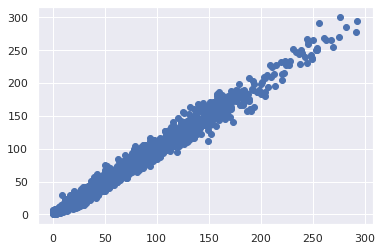

In [ ]:
# cluster sampling
plt.scatter(df2['bluecars_taken_sum'],df2['bluecars_returned_sum'])
plt.show

In [ ]:
x = df2.iloc[:, 2:4]
x

,bluecars_taken_sum,bluecars_returned_sum
3905,28,17
3911,24,21
3912,27,30
3918,16,10
3919,18,14
...,...,...
16068,36,33
16074,15,15
16075,34,32
16081,19,19


In [ ]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 34.27572202,  33.5916065 ],
       [127.26238286, 127.84872825]])

In [ ]:
kmeans.inertia_

4602334.500908243

In [ ]:
# Create a copy of the data
df3 = df2.copy()
# Create a new Series, containing the identified cluster for each observation
df3['Cluster'] = identified_clusters
# Check the result
df3

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,Cluster
3905,91330,6,28,17,0
3911,91330,5,24,21,0
3912,91330,6,27,30,0
3918,91330,5,16,10,0
3919,91330,6,18,14,0
...,...,...,...,...,...
16068,95880,6,36,33,0
16074,95880,5,15,15,0
16075,95880,6,34,32,0
16081,95880,5,19,19,0


In [ ]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df3)

array([[-1.7546114 ,  0.94578078, -0.60670759, -0.81372991, -0.58111747],
       [-1.7546114 , -1.05732747, -0.6883681 , -0.73307217, -0.58111747],
       [-1.7546114 ,  0.94578078, -0.62712271, -0.55159225, -0.58111747],
       ...,
       [ 2.72513968,  0.94578078, -0.48421681, -0.51126338, -0.58111747],
       [ 2.72513968, -1.05732747, -0.79044374, -0.77340104, -0.58111747],
       [ 2.72513968,  0.94578078, -0.50463194, -0.45077007, -0.58111747]])

In [ ]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(df3,2)
gmm = pd.DataFrame(clust_labels3)
df3.insert((df3.shape[1]),'gmm',gmm)

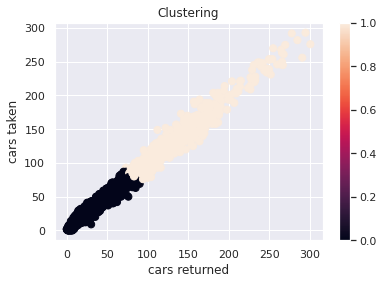

In [ ]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df3['bluecars_returned_sum'],df3['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)

# 5.0 **CONCLUSION**



> We fail to reject the null hypothesis becase there is no sufficient evidence to prove that the average means of the blue cars taken and returned are equal.

